# About Notebook

This notebook is to read, explore and preprocess the bee image dataset. This notebook will be the one used for our capstone project

# Library

In [1]:
import tensorflow as tf
import glob, os
import tqdm
import os
import numpy as np
from PIL import Image

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, LeakyReLU

In [4]:
import cv2
from google.colab.patches import cv2_imshow

import imageio
import skimage
import skimage.io
import skimage.transform

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Capstone Project C23-PC648/Notebook

Mounted at /content/drive
/content/drive/MyDrive/Capstone Project C23-PC648/Notebook


# Move dataset to classified folder

## Moving and copying files

In [ ]:
import os
import shutil

In [ ]:
bee_data = pd.read_csv('bee_data.csv')

In [ ]:
origin_dir = 'bee_imgs/'
target_dir = 'class_imgs/'

In [ ]:
health_name = bee_data['health'].unique()
health_name

array(['hive being robbed', 'healthy', 'few varrao, hive beetles',
       'ant problems', 'missing queen', 'Varroa, Small Hive Beetles'],
      dtype=object)

In [ ]:
def copy_file(dest):
  src_files = bee_data[bee_data['health'] == dest]['file'].values

  for file_name in src_files:
      full_file_name = os.path.join(origin_dir, file_name)

      if os.path.isfile(full_file_name):
          shutil.copy(full_file_name, target_dir + dest)

In [ ]:
# copy_file(health_name[0])
# copy_file(health_name[1])
# copy_file(health_name[2])
# copy_file(health_name[3])
# copy_file(health_name[4])
# copy_file(health_name[5])

## Checking files 

In [ ]:
for name in health_name:
  from_file = np.array(os.listdir(target_dir + name))
  from_data = bee_data[bee_data['health'] == name]['file'].values

  print((from_file == from_data).all(), name + ': ', len(from_file))

True hive being robbed:  251
True healthy:  3384
True few varrao, hive beetles:  579
True ant problems:  457
True missing queen:  29
True Varroa, Small Hive Beetles:  472


# 1. Read and Explore Data

## 1.1 Read dataset

In [7]:
bee_data = pd.read_csv('bee_data.csv')
bee_data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [ ]:
bee_data.shape

(5172, 9)

In [ ]:
bee_data.columns

Index(['file', 'date', 'time', 'location', 'zip code', 'subspecies', 'health',
       'pollen_carrying', 'caste'],
      dtype='object')

In [ ]:
bee_data.isnull().sum()

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64

In [ ]:
# print('Total image :', len(list(os.listdir(IMAGE_PATH))))

KeyboardInterrupt: ignored

## 1.2 Dataset Bees Health

In [ ]:
bee_data['health'].value_counts()

healthy                       3384
few varrao, hive beetles       579
Varroa, Small Hive Beetles     472
ant problems                   457
hive being robbed              251
missing queen                   29
Name: health, dtype: int64

In [ ]:
bee_data['health'].unique()

array(['hive being robbed', 'healthy', 'few varrao, hive beetles',
       'ant problems', 'missing queen', 'Varroa, Small Hive Beetles'],
      dtype=object)

# 2. Get Train and Test Data

## 2.1 Using ImageDataGenerator

```
class_imgs  
  |-- healthy                       3384  
  |-- few varrao, hive beetles       579  
  |-- Varroa, Small Hive Beetles     472  
  |-- ant problems                   457  
  |-- hive being robbed              251  
  |-- missing queen                   29
```



In [ ]:
IMAGE_DIR = 'class_imgs/'
IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
BATCH_SIZE = 32

SEED = 123

In [15]:
train_datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )

In [16]:
valid_datagen = ImageDataGenerator(
    # rescale=1./255,
    validation_split=0.2
    )

In [17]:
train_generator = train_datagen.flow_from_directory(
    directory=IMAGE_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',

    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED)

Found 4141 images belonging to 6 classes.


In [18]:
validation_generator = train_datagen.flow_from_directory(
    directory=IMAGE_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED)

Found 1031 images belonging to 6 classes.


In [ ]:
validation_generator.class_indices

{'Varroa, Small Hive Beetles': 0,
 'ant problems': 1,
 'few varrao, hive beetles': 2,
 'healthy': 3,
 'hive being robbed': 4,
 'missing queen': 5}

In [ ]:
from collections import Counter

counter = Counter(train_generator.classes)
print(counter.items())

counter = Counter(validation_generator.classes)
print(counter.items())


dict_items([(0, 378), (1, 366), (2, 464), (3, 2708), (4, 201), (5, 24)])
dict_items([(0, 94), (1, 91), (2, 115), (3, 676), (4, 50), (5, 5)])


## 2.2 Without ImageDataGenerator

In [8]:
IMAGE_DIR = 'class_imgs/'
IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
BATCH_SIZE = 32

SEED = 123

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIR,
  validation_split=0.2,
  subset="training",
  label_mode='categorical',
  seed=SEED,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 5172 files belonging to 6 classes.
Using 4138 files for training.


In [10]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIR,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=SEED,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 5172 files belonging to 6 classes.
Using 1034 files for validation.


# 3. Model Learning

In [19]:
def create_model():
  model = Sequential([
      Conv2D(16, kernel_size=3, input_shape=(100,100,3),
             activation='relu', padding='same'),
      MaxPool2D(2),

      Conv2D(16, kernel_size=3,
             activation='relu', padding='same'),
      MaxPool2D(2),

      Flatten(),
      Dense(6, activation='softmax')
  ])

  return model

In [20]:
tf.keras.backend.clear_session()

model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 6)                 6

In [ ]:
history = model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = 20,
    steps_per_epoch = int(4141/BATCH_SIZE)
    )

In [22]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 20,
    steps_per_epoch = int(4141/BATCH_SIZE)
    )

Epoch 1/20
  3/129 [..............................] - ETA: 11:44 - loss: 90.6552 - accuracy: 0.2812

KeyboardInterrupt: ignored

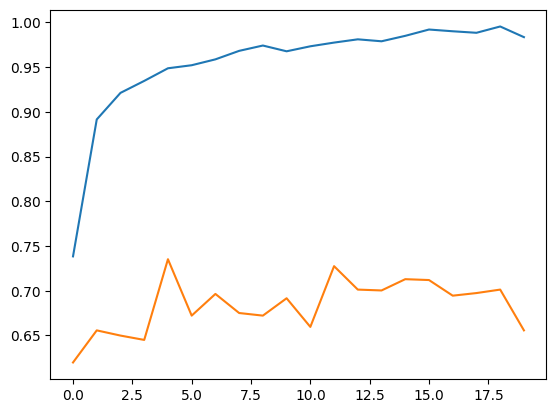

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.save('model_3.h5')

# 3. Transfer Learning

## 3.1 VGG-16

In [ ]:
tf.keras.backend.clear_session()

vgg16_trainable = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(100, 100, 3),
              include_top = False)

for layer in vgg16_trainable.layers:
  layer.trainable = False
  print(layer.name, layer.trainable)

58889256/58889256 [==============================] - 1s 0us/step
input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
def create_model():
  model_vgg16 = Sequential([
      vgg16_trainable,
      layers.Flatten(),

      layers.Dense(256, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(6, activation='softmax')
  ])

  return model_vgg16

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
def create_model():
  input_tensor = Input(shape=(100,100,3))

  base_model = ResNet50(
      include_top=False, weights=None, input_tensor=input_tensor,
      input_shape=None)

  x=base_model.output
  x=GlobalAveragePooling2D()(x)
  x=Dense(1024,activation='relu')(x) 
  x=Dense(1024,activation='relu')(x) 
  model=Model(inputs=base_model.input, outputs=Dense(6, activation='softmax')(x))
  return model

with strategy.scope():

  model_vgg16 = create_model()
  model_vgg16.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
  history = model_vgg16.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 10)

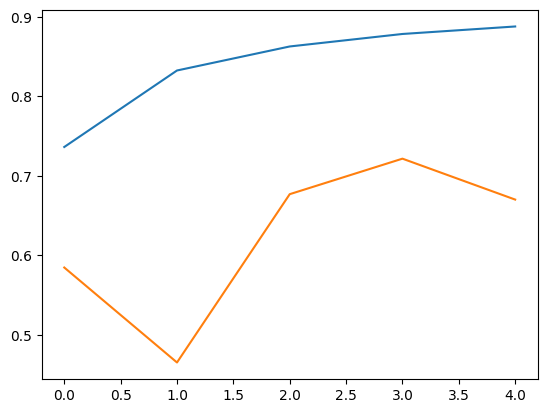

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])